# DASC 512 - Week 6

Welcome back to week 6 of DASC 512. This week's main topic will be **linear regression**.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
sns.set_style('darkgrid')

## Lesson 27 - Probabilistic Models

### Graphs from the lesson

In [13]:
xlst = np.random.rand(25) * 10

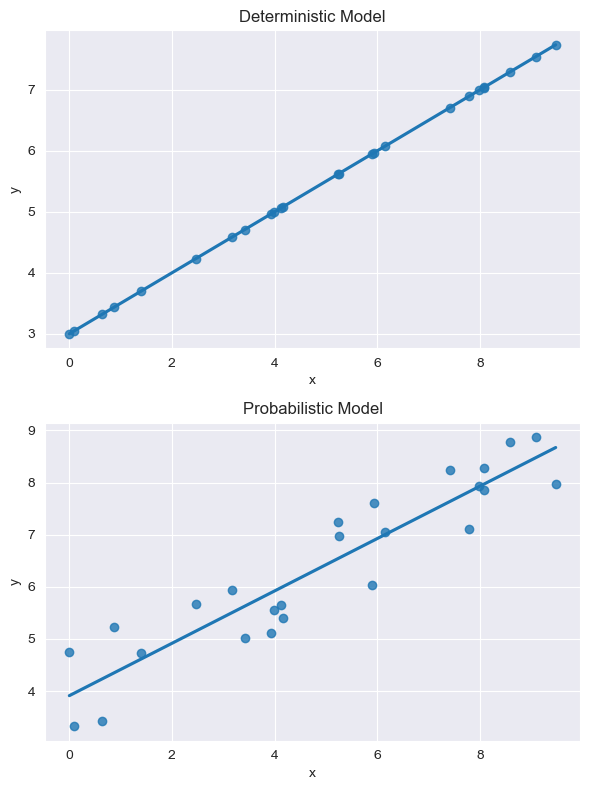

In [14]:
# Deterministic vs. Probabilistic
fig, ax = plt.subplots(nrows=2, figsize=(6,8))
#Deterministic
ylst = [(x/2 + 3) for x in xlst]
sns.regplot(x=xlst,y=ylst, ax=ax[0], ci=None)
ax[0].set_title('Deterministic Model')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
#Probabilistic
ylst = [(x/2 + 3 + 2 * np.random.rand()) for x in xlst]
sns.regplot(x=xlst,y=ylst,ax=ax[1], ci=None)
ax[1].set_title('Probabilistic Model')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
fig.tight_layout()

## Lesson 28 - Least Squares Estimation

### Graphs from Lesson

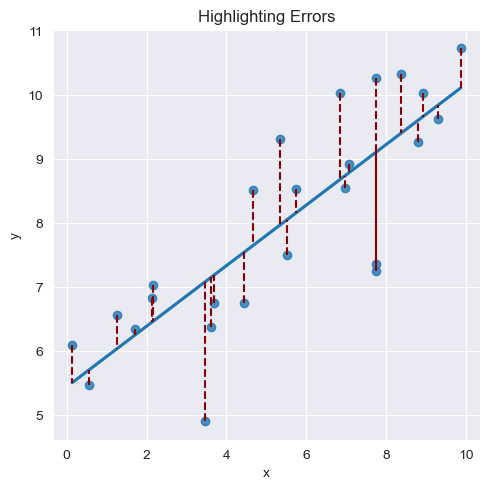

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
xlst = np.random.rand(25) * 10
ylst = [(x/2 + 3 + 4 * np.random.rand()) for x in xlst]
df = pd.DataFrame({'x':xlst, 'y':ylst})
model = smf.ols(formula='y ~ x', data=df).fit()
yhat = model.predict()

sns.regplot(data=df, x='x', y='y', ax=ax, ci=None)
ax.vlines(x=xlst, ymin=ylst, ymax=yhat, color='darkred', linestyle='--')

ax.set_title('Highlighting Errors')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.tight_layout()

### Rocket Propellant Example

In [16]:
prop = pd.read_csv('propellant.csv')

In [17]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sheer Strength (psi)       20 non-null     float64
 1   age of propellant (weeks)  20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [18]:
# For ease of typing (- )remember these become Pandas Series objects)
x = prop['age of propellant (weeks)']
y = prop['Sheer Strength (psi)']

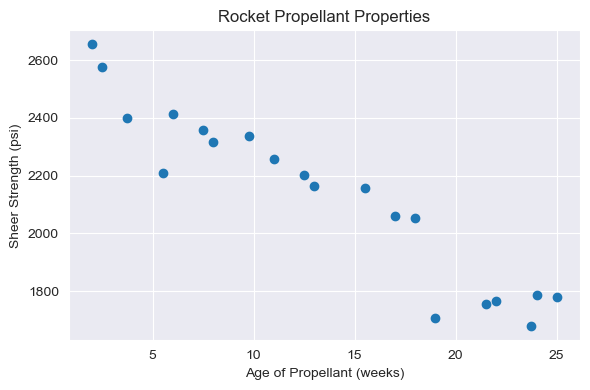

In [19]:
# Visualize data
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=x, y=y)
ax.set_title('Rocket Propellant Properties')
ax.set_xlabel('Age of Propellant (weeks)')
ax.set_ylabel('Sheer Strength (psi)')
fig.tight_layout()

In [20]:
# Intermediate calculations, for clarity
xbar = x.mean()
ybar = y.mean()

In [21]:
# Sum of Squares
SSxy = ((x-xbar)*(y-ybar)).sum()
SSxx = ((x-xbar)**2).sum()
print(f'SSxy: {SSxy:.0f}')
print(f'SSxx: {SSxx:.0f}')

SSxy: -41113
SSxx: 1107


In [22]:
# Slope
beta1 = SSxy/SSxx
beta1

-37.15359094490523

In [23]:
# y-intercept
beta0 = ybar - beta1 * xbar
beta0

2627.8223590012963

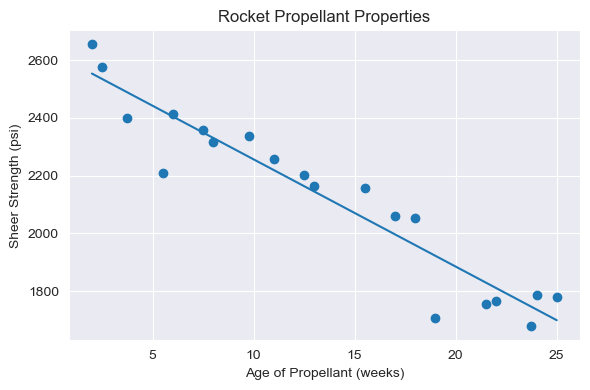

In [24]:
# Visualize data, now with a regression line!
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=x, y=y)

xrng = np.linspace(x.min(), x.max(), 100)
yhat = [(beta0 + beta1 * x) for x in xrng]
ax.plot(xrng,yhat)

ax.set_title('Rocket Propellant Properties')
ax.set_xlabel('Age of Propellant (weeks)')
ax.set_ylabel('Sheer Strength (psi)')
fig.tight_layout()

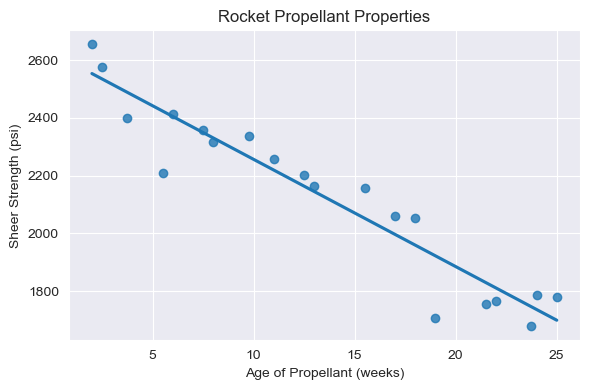

In [25]:
# And of course if we just let Seaborn do the plot it matches
fig, ax = plt.subplots(figsize=(6,4))
sns.regplot(data=prop, x='age of propellant (weeks)', y='Sheer Strength (psi)', ax=ax, ci=None)
ax.set_title('Rocket Propellant Properties')
ax.set_xlabel('Age of Propellant (weeks)')
ax.set_ylabel('Sheer Strength (psi)')
fig.tight_layout()

In [26]:
x.min()

2.0

In [27]:
x.max()

25.0

## Lesson 29 - Model Assumptions

### Graphs from Lesson

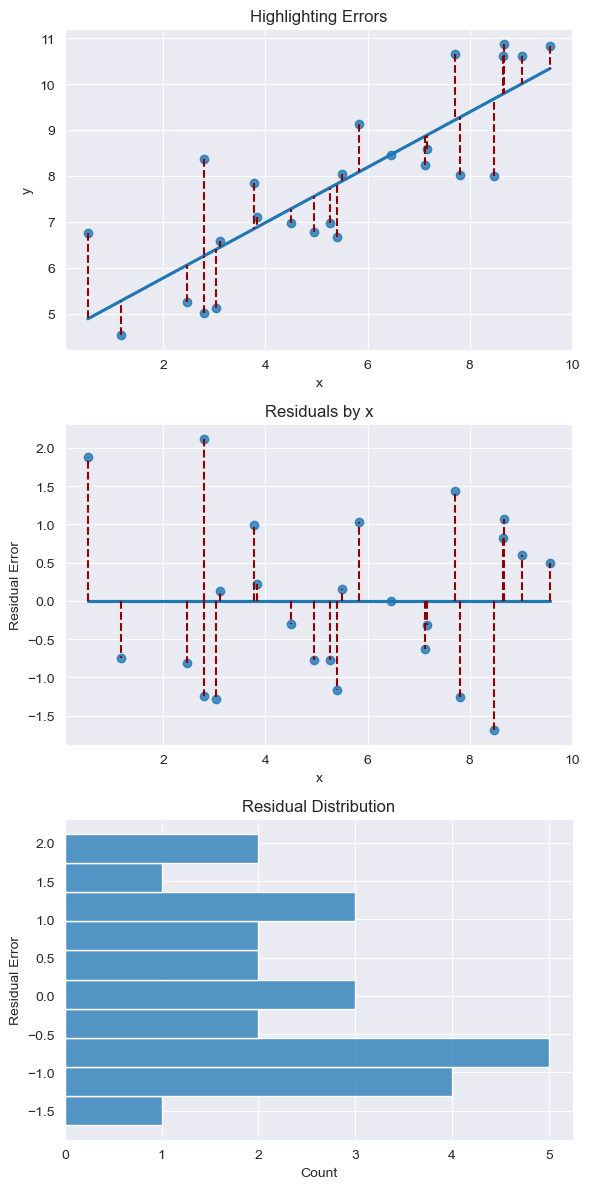

In [28]:
fig, ax = plt.subplots(nrows=3, figsize=(6,12))
xlst = np.random.rand(25) * 10
ylst = [(x/2 + 3 + 4 * np.random.rand()) for x in xlst]
df = pd.DataFrame({'x':xlst, 'y':ylst})
model = smf.ols(formula='y ~ x', data=df).fit()
yhat = model.predict()
df['resid'] = model.resid

sns.regplot(data=df, x='x', y='y', ax=ax[0], ci=None)
ax[0].vlines(x=xlst, ymin=ylst, ymax=yhat, color='darkred', linestyle='--')

ax[0].set_title('Highlighting Errors')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

sns.regplot(data=df, x='x', y='resid', ax=ax[1], ci=None)
ax[1].vlines(x=xlst, ymin=0, ymax=model.resid, color='darkred', linestyle='--')
ax[1].set_title('Residuals by x')
ax[1].set_ylabel('Residual Error')
ax[1].set_xlabel('x')

sns.histplot(data=df, y='resid', ax=ax[2], bins=10)
ax[2].set_title('Residual Distribution')
ax[2].set_ylabel('Residual Error')

fig.tight_layout()
plt.show()

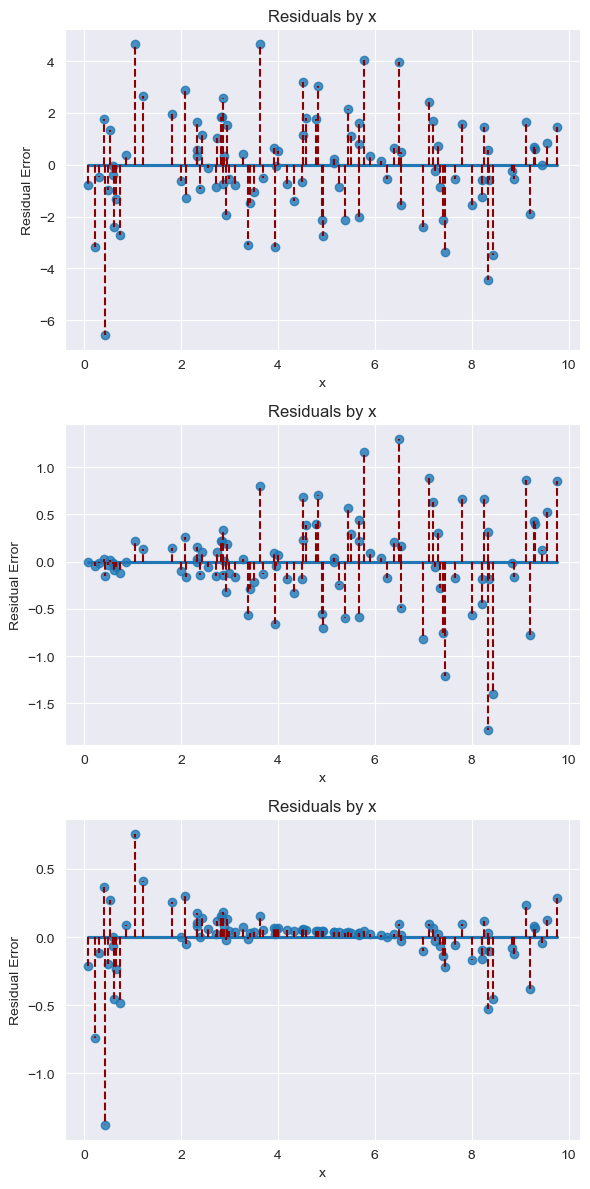

In [29]:
fig, ax = plt.subplots(nrows=3, figsize=(6,12))
xlst = np.random.rand(100) * 10
error = np.random.normal(loc=0,scale=2,size=100)
ylst = [[],[],[]]
ylst[0] = np.add([(x/2 + 3) for x in xlst],error)
ylst[1] = np.add([(x/2 + 3) for x in xlst], error * 0.05 * xlst)
ylst[2] = np.add([(x/2 + 3) for x in xlst], error * 0.01 * (xlst-5)**2)
df = pd.DataFrame({'x':xlst,'y0':ylst[0],'y1':ylst[1],'y2':ylst[2]})
model0 = smf.ols(formula='y0 ~ x', data=df).fit()
model1 = smf.ols(formula='y1 ~ x', data=df).fit()
model2 = smf.ols(formula='y2 ~ x', data=df).fit()
df['res0'] = model0.resid
df['res1'] = model1.resid
df['res2'] = model2.resid
for i in range(3):
    sns.regplot(data=df, x='x', y='res'+str(i), ax=ax[i], ci=None)
    ax[i].vlines(x=xlst, ymin=0, ymax=df['res'+str(i)], color='darkred', linestyle='--')
    ax[i].set_title('Residuals by x')
    ax[i].set_ylabel('Residual Error')
    ax[i].set_xlabel('x')
    
fig.tight_layout()
plt.show()

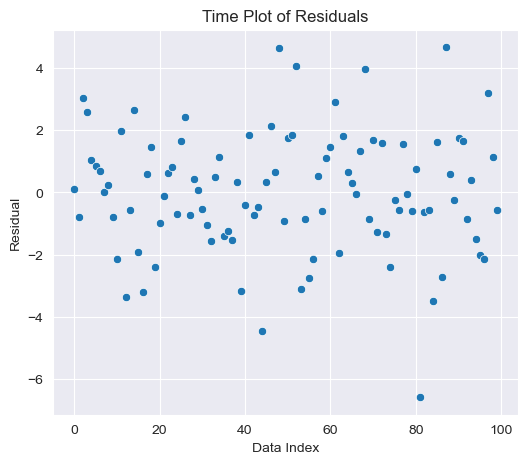

In [30]:
fig, ax = plt.subplots(figsize=(6,5))
sns.scatterplot(data=df, x=df.index, y='res0', ax=ax)
ax.set_title('Time Plot of Residuals')
ax.set_xlabel('Data Index')
ax.set_ylabel('Residual')
plt.show()

### Rocket Propellant Example

In [31]:
# Refreshing memory of what the columns are
prop.head()

,Sheer Strength (psi),age of propellant (weeks)
0,2158.70,15.50
1,1678.15,23.75
2,2316.00,8.00
3,2061.30,17.00
4,2207.50,5.50


In [32]:
# Calculate the predicted values (y hat)
prop['predicted'] = prop['age of propellant (weeks)'].apply(lambda xx: beta0 + beta1 * xx)

In [33]:
# Calculate the residuals (epsilon)
prop['residual'] = prop['Sheer Strength (psi)'] - prop['predicted']

#### Assumption 1 - Mean of epsilon is zero

In [34]:
prop['residual'].mean()

-5.684341886080802e-14

In [35]:
prop_model = smf.ols('Q("Sheer Strength (psi)") ~ Q("age of propellant (weeks)")', data=prop).fit()
prop_model.resid.mean()

8.526512829121202e-13

**Important Errata**: In the video, I say this is sufficient for this test, but a very important consideration is whether the mean error is zero across the entire range of input values. To do this, look for nonlinear trends in the same plot as in Assumption 2. The new textbook calls this assumption Linearity (see p.318). I'll introduce a function later in this course to help you eyeball changes in mean and variance.

#### Assumption 2 - Variance is constant

<AxesSubplot:xlabel='age of propellant (weeks)', ylabel='residual'>

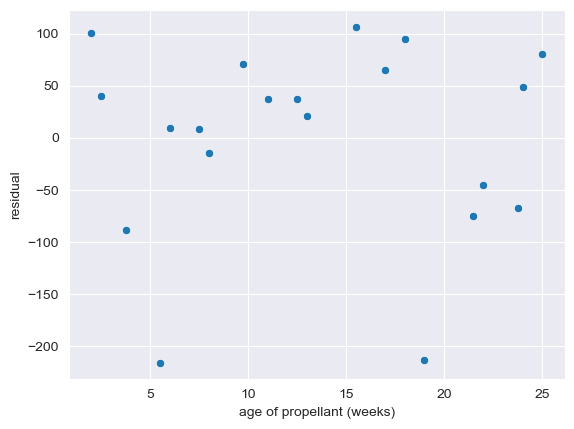

In [36]:
# Plot the residuals by x
sns.scatterplot(data=prop, x='age of propellant (weeks)', y='residual')

We see a couple of extreme values around 6 and 18 weeks, but no discernable pattern with so few data points.

In [37]:
# Calculate MSE (s^2)
sse = (prop['residual'] ** 2).sum()
mse = sse / (len(prop)-2)

In [38]:
mse

9236.381003721173

In [39]:
# So our estimate (s) of the standard deviation (sigma) is
np.sqrt(mse)

96.10609243810286

We would therefore expect 95% of data points to fall within about 190 psi of the predicted value.

#### Assumption 3 - residuals are normally distributed

In [40]:
stats.shapiro(prop['residual'])

ShapiroResult(statistic=0.8751437067985535, pvalue=0.01448559109121561)

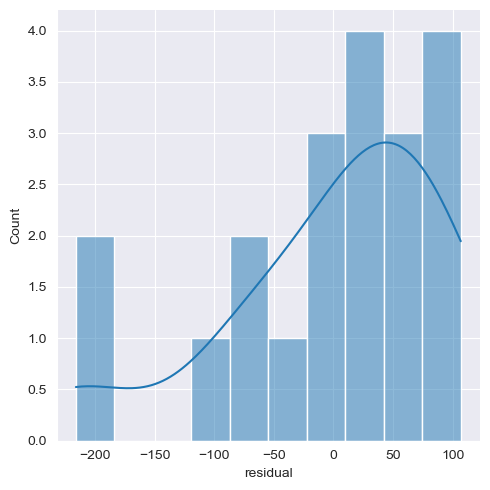

In [41]:
sns.displot(data=prop, x='residual', bins=10, kde=True)

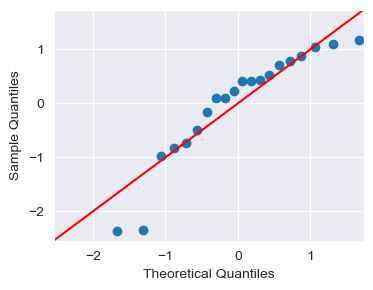

In [42]:
# Note this more correctly uses a 45-degree line instead of one 
# that is fit through the 1st/3rd quartiles of the data.
# It does not change the conclusions.

fig, ax = plt.subplots(figsize=(4,3))
sm.qqplot(data=prop['residual'],fit=True,line='45', ax=ax)
plt.show()

It appears that the residuals are not quite normally distributed. We'll discuss how we might deal with this sort of problem next week. For now, we'd want to know if those two outliers are explainable. Regression is fairly robust to modest violations of this assumption.

#### Assumption 4 - residuals are iid

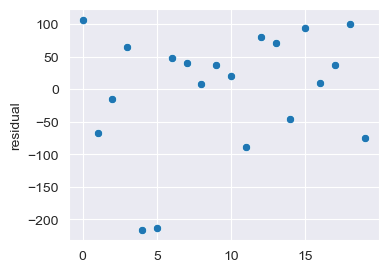

In [43]:
fig, ax = plt.subplots(figsize=(4,3))
sns.scatterplot(data=prop, x=prop.index, y='residual', ax=ax)
plt.show()

There is no obvious problem here. However, noting that our two outliers occurred back-to-back (observations 5 and 6 correcting for zero-indexing) is good information for possibly addressing the outliers. Let's assume we did some digging and found that those two observations experienced measurement errors. We'll throw them out.

### Rocket Example, removing Outliers

In [44]:
# If we assume those points were dropped, we'd go back through everything
prop2 = prop[['age of propellant (weeks)','Sheer Strength (psi)']].drop(index=[4,5])

In [45]:
# We'll use Python to speed things up
prop_model = smf.ols(formula='Q("Sheer Strength (psi)") ~ Q("age of propellant (weeks)")',data=prop2).fit()

In [46]:
prop_model.params

Intercept                         2658.972940
Q("age of propellant (weeks)")     -37.693771
dtype: float64

In [47]:
# Residuals - Outputs a Series object
res = prop_model.resid
prop2['residual'] = res

#### Assumption 1

In [48]:
res.mean()

8.842309600570136e-14

**Update**: Remember we also are looking at the scatterplot in Assumption 2 for non-linear trends.

#### Assumption 2

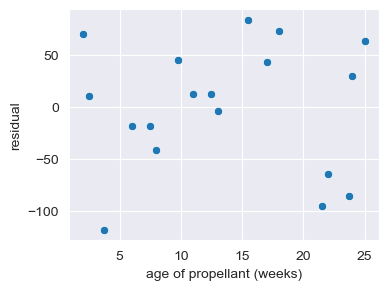

In [49]:
# Assumption 2 - Variance is constant
fig, ax = plt.subplots(figsize=(4,3))
sns.scatterplot(data=prop2, x='age of propellant (weeks)', y='residual')
plt.show()

In [50]:
res.var(ddof=2)

3964.628857165011

#### Assumption 3

In [51]:
# Assumption 3 - residuals are normally distributed
stats.shapiro(res)

ShapiroResult(statistic=0.946989893913269, pvalue=0.3797685205936432)

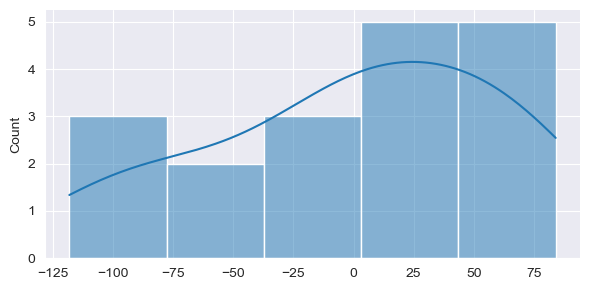

In [52]:
sns.displot(data=prop2, x=res, bins=5, kde=True, aspect=2, height=3)
plt.show()

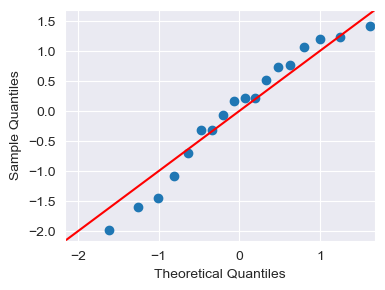

In [53]:
fig, ax = plt.subplots(figsize=(4,3))
sm.qqplot(data=res,fit=True,line='45', ax=ax)
plt.show()

Now we have perhaps a slightly heavy left tail in the distribution, but nothing major!

#### Assumption 4

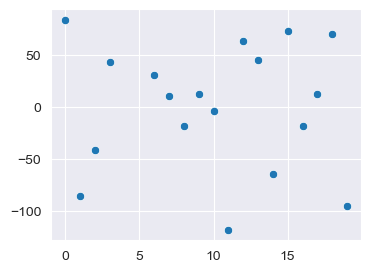

In [54]:
# Assumption 4 - residuals are independent
fig, ax = plt.subplots(figsize=(4,3))
sns.scatterplot(x=res.index, y=res, ax=ax)
plt.show()

## Lesson 30 - Inference about the Slope of the OLS Model

In [55]:
# Pull out our point estimates
beta0, beta1 = prop_model.params
beta1

-37.69377102241364

In [56]:
# Calculate the various sums of squares
x = prop2['age of propellant (weeks)']
y = prop2['Sheer Strength (psi)']
ss_xx = ((x - x.mean())**2).sum()
ss_xx

1012.6840277777778

In [57]:
# Alternate method of calculating ss_xx
ss_xx = x.var() * (len(x)-1)
ss_xx

1012.6840277777778

In [58]:
ss_xy = ((x - x.mean())*(y-y.mean())).sum()
ss_xy

-38171.87986111111

In [59]:
ss_yy = ((y-y.mean())**2).sum()
ss_yy

1502276.1606944443

In [60]:
# Alternate method of calculating ss_yy
ss_yy = y.var() * (len(y)-1)
ss_yy

1502276.160694444

In [61]:
sse = ss_yy - beta1 * ss_xy
sse

63434.06171463919

In [62]:
# Alternate method of calculating sse
sse = prop2['residual'].var() * (len(prop2)-1)
sse

63434.06171464018

In [63]:
mse = sse / (len(prop2) - 2)
mse

3964.628857165011

In [64]:
# Alternate calculation of mse
mse = (ss_yy - beta1 * ss_xy) / (len(prop2)-2)
mse

3964.6288571649493

In [65]:
# Alternate method of calculating mse
mse = prop2['residual'].var(ddof=2)
mse

3964.628857165011

In [66]:
# Alternate method using our Python OLS model
mse = prop_model.mse_resid
mse

3964.628857165012

In [67]:
s_beta1 = mse ** 0.5 / ss_xx ** 0.5
s_beta1

1.9786286293901194

In [68]:
# Margin of Error
moe = stats.t.isf(q=.025, df=len(prop2)-2) * s_beta1
ci = (beta1 - moe, beta1 + moe)
print(ci)
print(f'Margin of error: {np.ptp(ci)/2}')

(-41.88827633904816, -33.49926570577912)
Margin of error: 4.194505316634519


In [69]:
# Alternative margin of error and confidence interval
ci = stats.t(df=len(prop2)-2, loc=beta1, scale=s_beta1).interval(0.95)
print(ci)
print(f'Margin of error: {np.ptp(ci)/2}')

(-41.88827633904816, -33.49926570577912)
Margin of error: 4.194505316634519


In [70]:
# Another alternative method
prop_model.conf_int(alpha=0.05)

,0,1
Intercept,2594.244857,2723.701023
"Q(""age of propellant (weeks)"")",-41.888276,-33.499266


In [71]:
ci = prop_model.conf_int(alpha=0.05).iloc[1]
ci = (ci[0], ci[1])
print(ci)
print(f'Margin of error: {np.ptp(ci)/2}')

(-41.88827633904816, -33.49926570577912)
Margin of error: 4.194505316634519


In [72]:
# Test Statistic
t = beta1 / s_beta1
t

-19.050452653175316

In [73]:
# Alternative test statistic
prop_model.tvalues

Intercept                         87.083852
Q("age of propellant (weeks)")   -19.050453
dtype: float64

In [74]:
# P-value
p_val = 2 * stats.t.sf(abs(t), df=len(prop2)-2)
p_val

2.0229766331643114e-12

In [75]:
# Alternative p value
prop_model.pvalues

Intercept                         7.588232e-23
Q("age of propellant (weeks)")    2.022977e-12
dtype: float64

## Lesson 31 - Coefficients of Correlation and Determination

### Graphs from Lesson

In [76]:
x_rng = np.linspace(0,10,100)
y_pos = [(xx + np.random.normal()) for xx in x_rng]
y_neg = [(-xx + np.random.normal()) for xx in x_rng]
y_zero1 = [(np.random.normal()) for xx in np.linspace(0,5,50)]
y_zero = y_zero1.copy()
y_zero1.reverse()
y_zero += y_zero1
y_one = [(xx) for xx in x_rng]

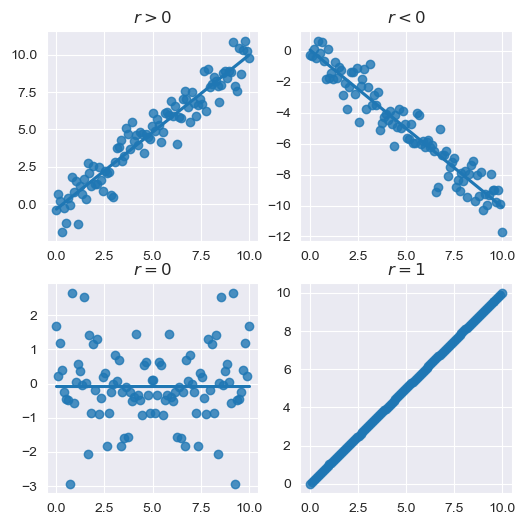

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,6))
sns.regplot(x=x_rng, y=y_pos, ax=ax[0,0], ci=None)
ax[0,0].set_title(r'$r>0$')
sns.regplot(x=x_rng, y=y_neg, ax=ax[0,1], ci=None)
ax[0,1].set_title(r'$r<0$')
sns.regplot(x=x_rng, y=y_zero, ax=ax[1,0], ci=None)
ax[1,0].set_title(r'$r=0$')
sns.regplot(x=x_rng, y=y_one, ax=ax[1,1], ci=None)
ax[1,1].set_title(r'$r=1$')
plt.show()

### Rocket Propellant Example

In [78]:
prop = pd.read_csv('propellant.csv').drop(index=[4,5])
prop.head()

,Sheer Strength (psi),age of propellant (weeks)
0,2158.70,15.50
1,1678.15,23.75
2,2316.00,8.00
3,2061.30,17.00
6,1784.70,24.00


In [79]:
prop_model = smf.ols(formula='Q("Sheer Strength (psi)") ~ Q("age of propellant (weeks)")',data=prop).fit()

In [80]:
x = prop['age of propellant (weeks)']
y = prop['Sheer Strength (psi)']
xbar = x.mean()
ybar = y.mean()
SS_xx = ((x-xbar)**2).sum()
SS_xy = ((x-xbar)*(y-ybar)).sum()
SS_yy = ((y-ybar)**2).sum()

In [81]:
prop['predicted'] = prop_model.predict()
prop['residuals'] = prop_model.resid
SSE = (prop['residuals'] ** 2).sum()
MSE = prop['residuals'].var(ddof=2)

In [82]:
r = SS_xy / np.sqrt(SS_xx * SS_yy)
print(r)

-0.9786596445662312


In [83]:
rsquared = r**2
print(rsquared)

0.9577746999025021


In [84]:
rsquared = (SS_yy - SSE)/SS_yy
print(rsquared)

0.957774699902502


In [85]:
prop_model.rsquared

0.9577746999025019

## Lesson 32 - Intervals of Prediction and Estimation

In [86]:
s = MSE ** 0.5
n = len(prop)
xbar = x.mean()
SS_xx = SS_xx

In [87]:
beta0, beta1 = prop_model.params

In [88]:
tcrit = stats.t.isf(q=0.025, df=n-2)

**Note**: The following functions require information we have calculated earlier. This is admittedly bad programming practice --- it makes sense in this context, but if you try to use this in a homework assignment, it will almost certainly fail you.

In [89]:
def s_est(xx):
    return s * np.sqrt(1/n + (xx - xbar)**2 / SS_xx)
def s_pred(xx):
    return s * np.sqrt(1 + 1/n + (xx - xbar)**2 / SS_xx)
def y_hat(xx):
    return beta0 + beta1 * xx

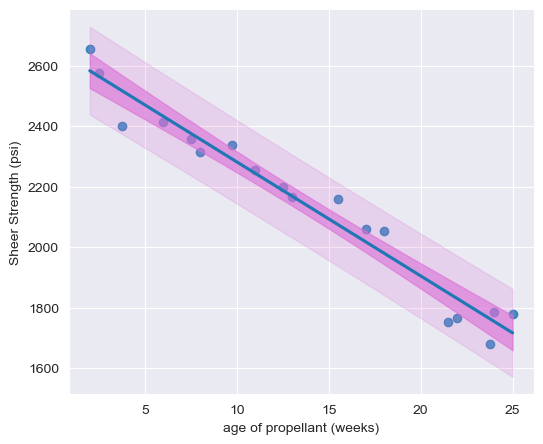

In [90]:
# Graph the two intervals on the scatterplot
fig, ax = plt.subplots(figsize=(6,5))
sns.regplot(data=prop, x='age of propellant (weeks)', y='Sheer Strength (psi)', ci=None, ax=ax)

x_rng = np.linspace(x.min(), x.max(), 100)
ei_lower = [(y_hat(xx) - tcrit * s_est(xx)) for xx in x_rng]
ei_upper = [(y_hat(xx) + tcrit * s_est(xx)) for xx in x_rng]
pi_lower = [(y_hat(xx) - tcrit * s_pred(xx)) for xx in x_rng]
pi_upper = [(y_hat(xx) + tcrit * s_pred(xx)) for xx in x_rng]
ax.fill_between(x_rng, ei_lower, ei_upper, color='orchid', alpha=0.6)
ax.fill_between(x_rng, pi_lower, pi_upper, color='orchid', alpha=0.2)

In [91]:
# Python makes it easier...
prop_model.summary2()

C:\Users\weimp\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                   OLS                          Adj. R-squared:        0.955   
Dependent Variable:      Q("Sheer Strength (psi)")    AIC:                   202.0947
Date:                    2022-11-17 09:54             BIC:                   203.8755
No. Observations:        18                           Log-Likelihood:        -99.047 
Df Model:                1                            F-statistic:           362.9   
Df Residuals:            16                           Prob (F-statistic):    2.02e-12
R-squared:               0.958                        Scale:                 3964.6  
-------------------------------------------------------------------------------------
                                 Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------------------------
Intercept                      2658.9729  30.5335  87.0839 0.0000 2594.2449 2723.7010
Q("age of propellant (weeks)")  -37.6938   1.9786 -19.0505 0.0000  -41.8883  -33.4993
-------------------------------------------------------------------------------------
Omnibus:                     1.422               Durbin-Watson:                 2.485
Prob(Omnibus):               0.491               Jarque-Bera (JB):              1.164
Skew:                        -0.448              Prob(JB):                      0.559
Kurtosis:                    2.133               Condition No.:                 32   
=====================================================================================

"""

In [92]:
# What about those intervals?
dfpred = pd.DataFrame({'age of propellant (weeks)':[10,15]})
dfpred.head()

,age of propellant (weeks)
0,10
1,15


In [93]:
prediction = prop_model.get_prediction(dfpred)

In [94]:
prediction.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2282.035230,16.365686,2247.341524,2316.728935,2144.119715,2419.950744
1,2093.566374,15.140334,2061.470299,2125.662449,1956.281291,2230.851458


In [95]:
dfpred = dfpred.join(prediction.summary_frame(alpha=0.05))

In [96]:
dfpred

,age of propellant (weeks),mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,10,2282.035230,16.365686,2247.341524,2316.728935,2144.119715,2419.950744
1,15,2093.566374,15.140334,2061.470299,2125.662449,1956.281291,2230.851458


We could use this concept to plot our intervals a different way.

In [97]:
x_arr = np.linspace(x.min(), x.max(), 100)
dfpred = pd.DataFrame({'age of propellant (weeks)':x_arr})
prediction = prop_model.get_prediction(dfpred)
dfpred = dfpred.join(prediction.summary_frame(alpha=0.05))

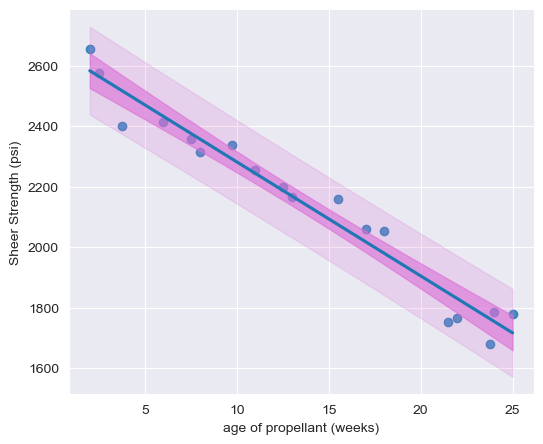

In [98]:
fig, ax = plt.subplots(figsize=(6,5))
sns.regplot(data=prop, x='age of propellant (weeks)', y='Sheer Strength (psi)', ci=None, ax=ax)

x = dfpred['age of propellant (weeks)']
ei_lower = dfpred['mean_ci_lower']
ei_upper = dfpred['mean_ci_upper']
pi_lower = dfpred['obs_ci_lower']
pi_upper = dfpred['obs_ci_upper']
ax.fill_between(x, ei_lower, ei_upper, color='orchid', alpha=0.6)
ax.fill_between(x, pi_lower, pi_upper, color='orchid', alpha=0.2)